In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
le = LabelEncoder()
data['SMOKER'] = le.fit_transform(data['smoker'])
data['REGION'] = le.fit_transform(data['region'])
data['SEX']  = le.fit_transform(data['sex'])

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges,SMOKER,REGION,SEX
0,19,female,27.900,0,yes,southwest,16884.92400,1,3,0
1,18,male,33.770,1,no,southeast,1725.55230,0,2,1
2,28,male,33.000,3,no,southeast,4449.46200,0,2,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1


In [7]:
data = data[['age','bmi','children','SMOKER','REGION','SEX','charges']]
data.head()

,age,bmi,children,SMOKER,REGION,SEX,charges
0,19,27.900,0,1,3,0,16884.92400
1,18,33.770,1,0,2,1,1725.55230
2,28,33.000,3,0,2,1,4449.46200
3,33,22.705,0,0,1,1,21984.47061
4,32,28.880,0,0,1,1,3866.85520


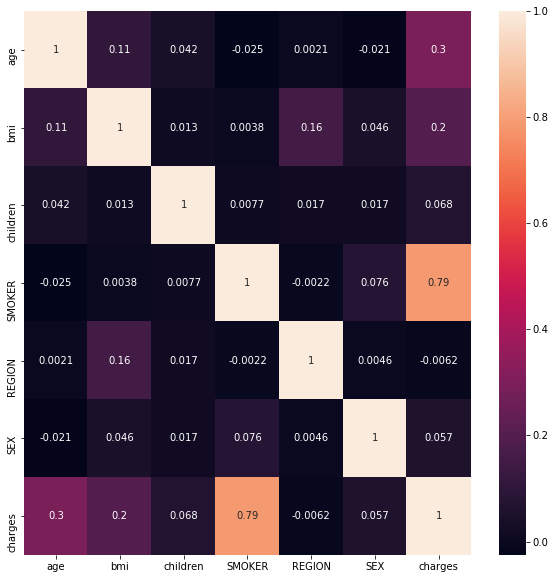

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True)

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
def Normalize(x):
    return ((x - min(x)) / (max(x) - min(x)))

In [11]:
for i in range(X.shape[1]):
    X[:,i] = Normalize(X[:,i])


In [12]:
X

array([[0.02173913, 0.3212268 , 0.        , 1.        , 1.        ,
        0.        ],
       [0.        , 0.47914985, 0.2       , 0.        , 0.66666667,
        1.        ],
       [0.2173913 , 0.45843422, 0.6       , 0.        , 0.66666667,
        1.        ],
       ...,
       [0.        , 0.56201238, 0.        , 0.        , 0.66666667,
        0.        ],
       [0.06521739, 0.26472962, 0.        , 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , 1.        , 0.33333333,
        0.        ]])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [14]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = lr.predict(x_train)

In [16]:
df = pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
df.head()

,Actual,Predicted
0,9193.83850,7155.720952
1,8534.67180,8301.243685
2,27117.99378,9225.278476
3,8596.82780,11185.497234
4,12475.35130,10147.650383


In [17]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.7417049283233981, 0.7833463107364539)

<Figure size 1440x1440 with 0 Axes>

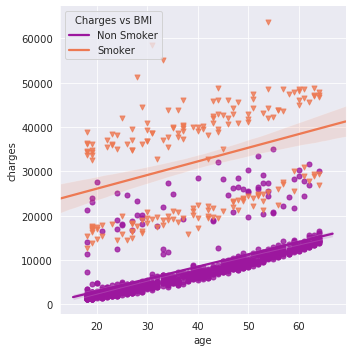

In [22]:
plt.figure(figsize = (20,20))
sns.set_style('darkgrid')
sns.lmplot(x = 'age' , y = 'charges' , data = data[:1000]  , hue = 'SMOKER' , markers = ['o' , 'v'], scatter_kws = {'s':25} , palette = 'plasma' , legend = False)
plt.legend(title = 'Charges vs BMI' , loc = 'upper left' , labels = ['Non Smoker' , 'Smoker'])